In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', size=18); plt.rcParams['figure.constrained_layout.use'] = True
import datetime
import pylab
import math

import functions.misc_functions as misc

In [2]:
df1 = pd.read_csv('data/buckingham.csv', usecols=[1,5])

df1['TIME'] = pd.to_datetime(df1['TIME'])


# start = pd.to_datetime('2020-01-27')   # 2020-01-01 06:25:02. Data only reliable after 2020-01-26.
# end = pd.to_datetime(str(max(df1.TIME)))     # 2020-04-01 23:55:02. 
# start_date = start.date()
# end_date = end.date()

# t_start = pd.DatetimeIndex([start]).astype(np.int64)/1000000000
# t_end = pd.DatetimeIndex([end]).astype(np.int64)/1000000000


t_full=pd.array(pd.DatetimeIndex(df1.iloc[:,0]).astype(np.int64))/1000000000
df1['T']=(t_full-t_full[0])/60/60/24 # convert timestamp to days
df1['t'] = df1['T'].apply(lambda x: x%1)

# df
df1.drop(df1.loc[df1['T']<27].index, inplace=True)
df1['WEEKDAY'] = pd.to_datetime(df1['TIME'])
df1['WEEKDAY'] = df1['WEEKDAY'].dt.dayofweek
# t = np.extract([(t_full>=t_start) & (t_full<=t_end)], t_full)
dt = t_full[1] - t_full[0]
# print(f"sampling interval = {dt} seconds")

In [3]:
df1

,TIME,AVAILABLE BIKES,T,t,WEEKDAY
1879,2020-01-28 06:25:02,23,27.000000,0.000000,1
1880,2020-01-28 06:30:27,23,27.003762,0.003762,1
1881,2020-01-28 06:35:02,23,27.006944,0.006944,1
1882,2020-01-28 06:40:02,23,27.010417,0.010417,1
1883,2020-01-28 06:45:02,23,27.013889,0.013889,1
...,...,...,...,...,...
20364,2020-04-01 23:35:02,11,91.715278,0.715278,2
20365,2020-04-01 23:40:02,11,91.718750,0.718750,2
20366,2020-04-01 23:45:02,11,91.722222,0.722222,2
20367,2020-04-01 23:50:03,11,91.725706,0.725706,2


In [4]:
# df1['t'] = df1['T'].apply(lambda x: x%1)
# df1

,TIME,AVAILABLE BIKES,T,t,WEEKDAY
1879,2020-01-28 06:25:02,23,27.000000,0.000000,1
1880,2020-01-28 06:30:27,23,27.003762,0.003762,1
1881,2020-01-28 06:35:02,23,27.006944,0.006944,1
1882,2020-01-28 06:40:02,23,27.010417,0.010417,1
1883,2020-01-28 06:45:02,23,27.013889,0.013889,1
...,...,...,...,...,...
20364,2020-04-01 23:35:02,11,91.715278,0.715278,2
20365,2020-04-01 23:40:02,11,91.718750,0.718750,2
20366,2020-04-01 23:45:02,11,91.722222,0.722222,2
20367,2020-04-01 23:50:03,11,91.725706,0.725706,2


In [5]:
df2 = pd.read_csv('data/kilmainham.csv', usecols=[1,5])


start = pd.to_datetime(str(min(df2.TIME)))   # 2020-01-01 06:25:02. Data only reliable after 2020-01-26.
end = pd.to_datetime(str(max(df2.TIME)))     # 2020-04-01 23:55:02. 
start_date = start.date()
end_date = end.date()

t_start = pd.DatetimeIndex([start]).astype(np.int64)/1000000000
t_end = pd.DatetimeIndex([end]).astype(np.int64)/1000000000


t_full2=pd.array(pd.DatetimeIndex(df2.iloc[:,0]).astype(np.int64))/1000000000
df2['T']=(t_full2-t_full2[0])/60/60/24 # convert timestamp to days
df2['t'] = df2['T'].apply(lambda x: x % 1) # column that has a number that essentially equates to time.

df2.drop(df2.loc[df2['T']<27].index, inplace=True)
df2.drop(df2.loc[df2['T']>90].index, inplace=True)

df2['WEEKDAY'] = pd.to_datetime(df2['TIME'])
df2['WEEKDAY'] = df2['WEEKDAY'].dt.dayofweek
# t = np.extract([(t_full>=t_start) & (t_full<=t_end)], t_full)
dt = t_full[1] - t_full[0]
print(f"sampling interval = {dt} seconds")



sampling interval = 300.0 seconds


need to decide training data size/dates

Text(0, 0.5, 'Number of Available Bikes')

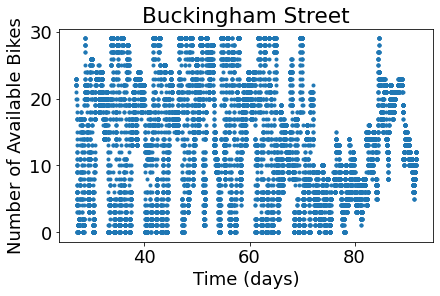

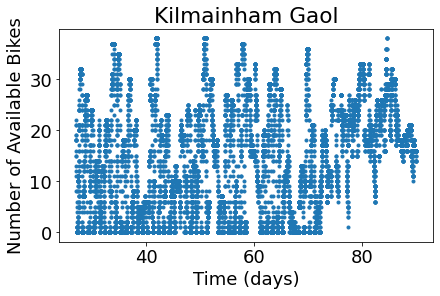

In [6]:
plt.figure('Buckingham')
plt.scatter(df1['T'], df1['AVAILABLE BIKES'],marker='.')
plt.title("Buckingham Street")
plt.xlabel("Time (days)")
plt.ylabel("Number of Available Bikes")
# pylab.xlim(27, 90)

plt.figure('Kilmainham')
plt.scatter(df2['T'], df2['AVAILABLE BIKES'],marker='.')
plt.title("Kilmainham Gaol")
plt.xlabel("Time (days)")
plt.ylabel("Number of Available Bikes")
# pylab.xlim(0, 90)

In [7]:
day = 47 # simple way to find out how many datapoints are in one of the days.
np.shape(df1.loc[(df1['T']<=day) & (df1['T']> day - 1)])


(288, 5)

### 10 min ahead features

In [8]:
T10 = misc.make_features(periods = 2, dataframe=df1,col='T',name='T10')
B10 = misc.make_features(periods = 2, dataframe=df1,col='AVAILABLE BIKES',name='B10')
B10
# five_before.reset_index(inplace = True)
# five_before.drop(columns=['index'])

,B10
0,0
1,0
2,23
3,23
4,23
...,...
18485,11
18486,11
18487,11
18488,11


### 30 min ahead features

### 60 min ahead features